In [39]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# load data 

In [45]:
# Load the Excel file without specifying columns
file_path = r'D:\EXCELR\Assignments\Association Rules\Online retail.xlsx'  # Replace with your file path
df = pd.read_excel(file_path, header=None)

# Split the single column into multiple columns based on commas
df_split = df[0].str.split(',', expand=True)

# Save the result to a CSV file
output_path = 'D:\EXCELR\Assignments\Association Rules\output_file.csv'  # Replace with your desired output path
df_split.to_csv(output_path, index=False)

print(f"Data has been saved to {output_path}")



<>:9: DeprecationWarning: invalid escape sequence '\E'
<>:9: DeprecationWarning: invalid escape sequence '\E'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14696\2506540998.py:9: DeprecationWarning: invalid escape sequence '\E'
  output_path = 'D:\EXCELR\Assignments\Association Rules\output_file.csv'  # Replace with your desired output path


Data has been saved to D:\EXCELR\Assignments\Association Rules\output_file.csv


In [46]:
dd= pd.read_csv('D:\EXCELR\Assignments\Association Rules\output_file.csv')
dd.head()

<>:1: DeprecationWarning: invalid escape sequence '\E'
<>:1: DeprecationWarning: invalid escape sequence '\E'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14696\3903473342.py:1: DeprecationWarning: invalid escape sequence '\E'
  dd= pd.read_csv('D:\EXCELR\Assignments\Association Rules\output_file.csv')


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Dataset
The contains information about customers buying different grocery items.

In [48]:
data = dd.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [49]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,salmon,frozen smoothie,protein bar,spinach,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


# EDA

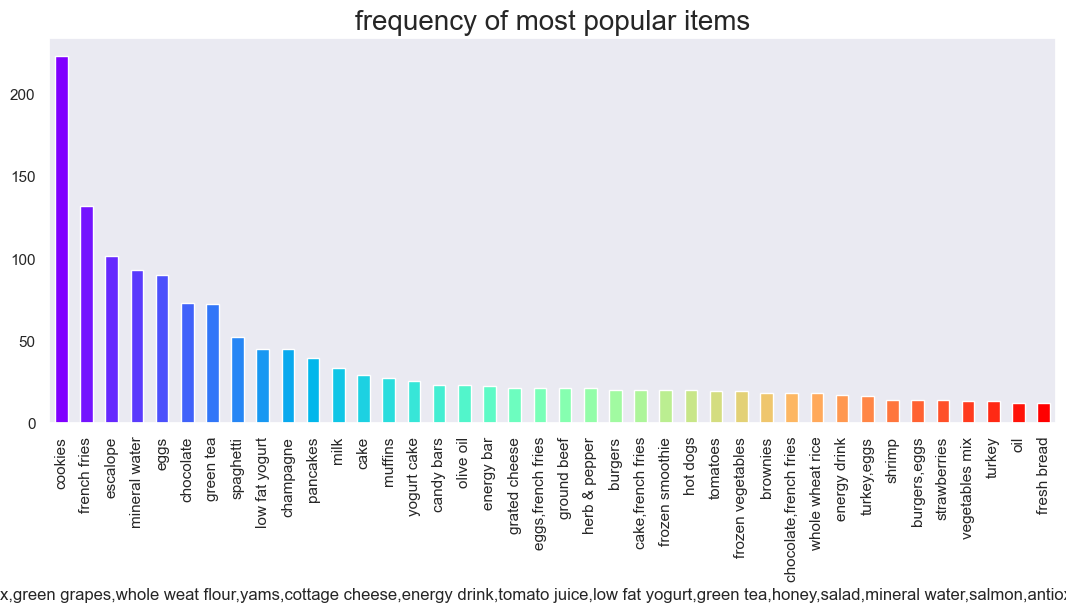

In [51]:
color = plt.cm.rainbow(np.linspace(0, 1, 40))
Data[Data.columns[0]].value_counts().head(40).plot.bar(color = color, figsize=(13,5)) # Access the first column using its index
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [57]:
import networkx as nx
Data['food'] = 'Food'
food = Data.truncate(before = -1, after = 15)
food = nx.from_pandas_edgelist(food, source='food', target=food.columns[0])

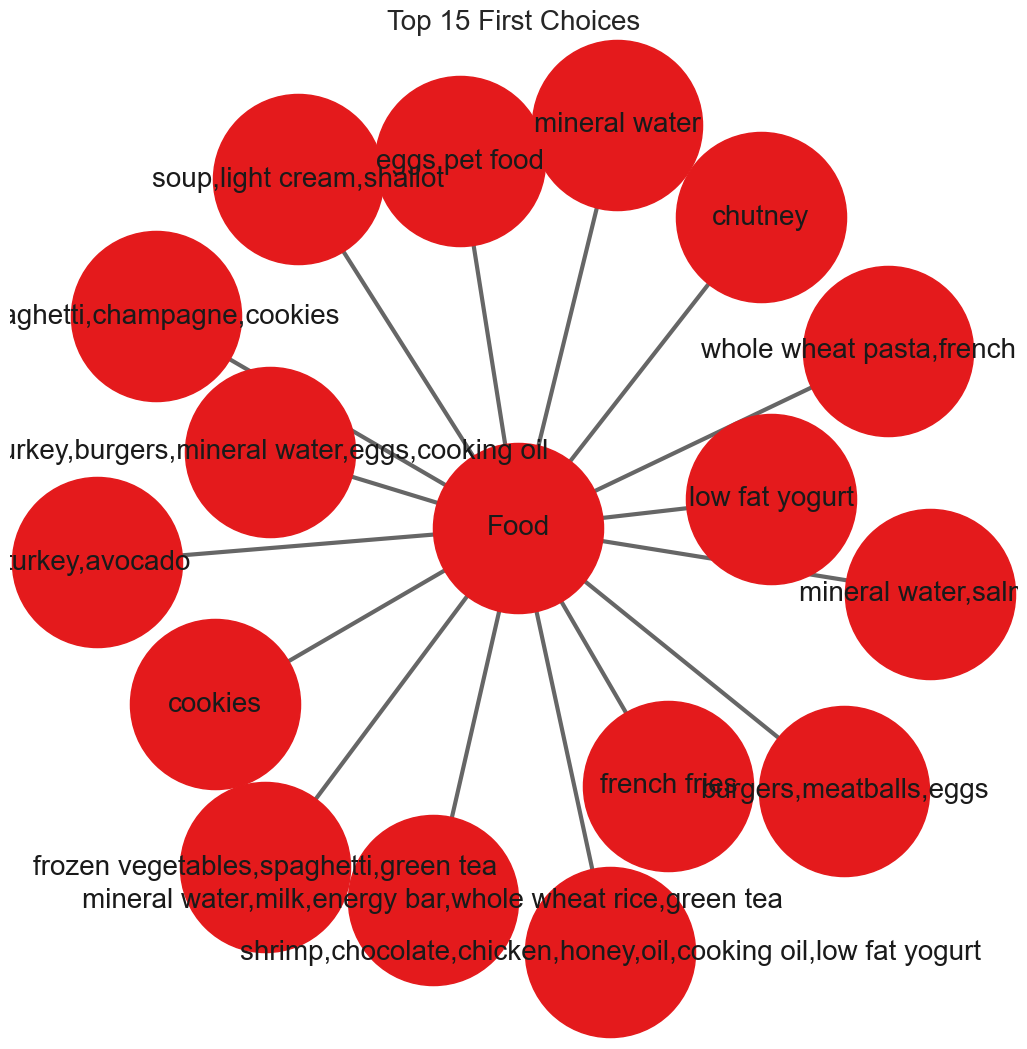

In [58]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (13, 13)
pos = nx.spring_layout(food)
color = plt.cm.Set1(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(food, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(food, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(food, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 First Choices', fontsize = 20)
plt.show()

# Getting the list of transactions

In [59]:
transactions = []
for i in range(0, len(data)):
    transactions.append([str(data.values[i,j]) for j in range(0, len(data.columns))])

In [60]:
transactions[:1]

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil',
  'Food']]

# Apriori

In [66]:
from apyori import apriori
results = apriori(transactions=transactions,
                  min_support = 0.003,
                  min_confidence = 0.2,
                  min_lift = 3,
                  min_length = 2, max_length = 2)


rules = list(results)


rules
len(rules)

9

In [67]:
rules[0]
rules[0][0]
rules[0][1] # support
rules[0][2][0][0] # base item
rules[0][2][0][1] # add item
rules[0][2][0][2] # confidence
rules[0][2][0][3] # lift


a=[]
b=[]
c=[]
d=[]
e=[]

for i in range(0,9):
    a.append(rules[i][2][0][0]) # base item
    b.append(rules[i][2][0][1]) # add item
    c.append(rules[i][1]) # support
    d.append(rules[i][2][0][2]) # confidence
    e.append(rules[i][2][0][3]) # lift


d1 = pd.DataFrame(a,columns=['Base item'])
d2 = pd.DataFrame(b,columns=['Add item'])
d3 = pd.DataFrame(c,columns=['Support'])
d4 = pd.DataFrame(d,columns=['Confidence'])
d5 = pd.DataFrame(e,columns=['Lift'])

df= pd.concat([d1,d2,d3,d4,d5],axis=1)
df

,Base item,Add item,Support,Confidence,Lift
0,light cream,chicken,0.004533,0.290598,4.843951
1,mushroom cream sauce,escalope,0.005733,0.300699,3.790833
2,pasta,escalope,0.005866,0.372881,4.700812
3,fromage blanc,honey,0.003333,0.245098,5.164271
4,herb & pepper,ground beef,0.015998,0.323450,3.291994
5,tomato sauce,ground beef,0.005333,0.377358,3.840659
6,light cream,olive oil,0.003200,0.205128,3.114710
7,whole wheat pasta,olive oil,0.007999,0.271493,4.122410
8,pasta,shrimp,0.005066,0.322034,4.506672


In [68]:
from itertools import permutations

# Extract unique items.
flattened = [item for transaction in transactions for item in transaction]
items = list(set(flattened))

In [69]:
print('# of items:',len(items))
print(list(items))

# of items: 122
['pickles', 'sandwich', 'whole wheat pasta', 'energy drink', 'mashed potato', 'tomato juice', 'shallot', 'oil', 'body spray', 'muffins', 'tomato sauce', 'rice', 'champagne', 'clothes accessories', 'cooking oil', 'burger sauce', 'bramble', 'dessert wine', 'eggplant', 'pet food', 'turkey', 'blueberries', 'cider', 'zucchini', 'green grapes', 'sparkling water', 'honey', 'ham', 'white wine', 'french wine', 'green beans', 'milk', 'light cream', 'whole weat flour', 'pepper', 'mint', 'yams', 'tomatoes', 'meatballs', 'brownies', 'nan', 'green tea', 'grated cheese', 'napkins', 'burgers', 'almonds', 'soda', 'soup', 'chocolate', 'salt', 'vegetables mix', 'shampoo', 'antioxydant juice', 'cereals', 'chili', 'butter', 'carrots', 'fresh tuna', 'black tea', 'fromage blanc', 'frozen vegetables', 'cake', 'hand protein bar', 'mushroom cream sauce', 'hot dogs', 'whole wheat rice', 'yogurt cake', 'frozen smoothie', 'babies food', 'mayonnaise', 'cauliflower', 'low fat yogurt', 'ketchup', 'ene

In [70]:
if 'nan' in items: items.remove('nan')
print(list(items))

['pickles', 'sandwich', 'whole wheat pasta', 'energy drink', 'mashed potato', 'tomato juice', 'shallot', 'oil', 'body spray', 'muffins', 'tomato sauce', 'rice', 'champagne', 'clothes accessories', 'cooking oil', 'burger sauce', 'bramble', 'dessert wine', 'eggplant', 'pet food', 'turkey', 'blueberries', 'cider', 'zucchini', 'green grapes', 'sparkling water', 'honey', 'ham', 'white wine', 'french wine', 'green beans', 'milk', 'light cream', 'whole weat flour', 'pepper', 'mint', 'yams', 'tomatoes', 'meatballs', 'brownies', 'green tea', 'grated cheese', 'napkins', 'burgers', 'almonds', 'soda', 'soup', 'chocolate', 'salt', 'vegetables mix', 'shampoo', 'antioxydant juice', 'cereals', 'chili', 'butter', 'carrots', 'fresh tuna', 'black tea', 'fromage blanc', 'frozen vegetables', 'cake', 'hand protein bar', 'mushroom cream sauce', 'hot dogs', 'whole wheat rice', 'yogurt cake', 'frozen smoothie', 'babies food', 'mayonnaise', 'cauliflower', 'low fat yogurt', 'ketchup', 'energy bar', 'asparagus', 

In [71]:
# Compute and print rules.
rules = list(permutations(items, 2))
print('# of rules:',len(rules))
print(rules[:5])

# of rules: 14520
[('pickles', 'sandwich'), ('pickles', 'whole wheat pasta'), ('pickles', 'energy drink'), ('pickles', 'mashed potato'), ('pickles', 'tomato juice')]


# Recommending food with support

In [72]:
# Import the transaction encoder function from mlxtend
from mlxtend.preprocessing import TransactionEncoder

# Instantiate transaction encoder and identify unique items
encoder = TransactionEncoder().fit(transactions)

# One-hot encode transactions
onehot = encoder.transform(transactions)

# Convert one-hot encoded data to DataFrame
onehot = pd.DataFrame(onehot, columns = encoder.columns_).drop('nan', axis=1)

# Print the one-hot encoded transaction dataset
onehot.head()

,asparagus,Food,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,bramble,brownies,bug spray,burger sauce,burgers,butter,cake,candy bars,carrots,cauliflower,cereals,champagne,chicken,chili,chocolate,chocolate bread,chutney,cider,clothes accessories,cookies,cooking oil,corn,cottage cheese,cream,dessert wine,...,parmesan cheese,pasta,pepper,pet food,pickles,protein bar,red wine,rice,salad,salmon,salt,sandwich,shallot,shampoo,shrimp,soda,soup,spaghetti,sparkling water,spinach,strawberries,strong cheese,tea,tomato juice,tomato sauce,tomatoes,toothpaste,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [73]:
# Compute the support
support = onehot.mean()
support = pd.DataFrame(support, columns=['support']).sort_values('support',ascending=False)

# Print the support
support.head()

,support
Food,1.000000
mineral water,0.238368
eggs,0.179709
spaghetti,0.174110
french fries,0.170911


In [74]:
# Compute support for burgers and french fries
supportBF = np.logical_and(onehot['burgers'], onehot['french fries']).mean()

# Compute support for burgers and mineral water
supportBM = np.logical_and(onehot['burgers'], onehot['mineral water']).mean()

# Compute support for french fries and mineral water
supportFM = np.logical_and(onehot['french fries'], onehot['mineral water']).mean()

# Print support values
print("burgers and french fries: %.2f" % supportBF)
print("burgers and mineral water: %.2f" % supportBM)
print("french fries and mineral water: %.2f" % supportFM)

burgers and french fries: 0.02
burgers and mineral water: 0.02
french fries and mineral water: 0.03


In [75]:
# Add a mineral water+french fries column to the DataFrame onehot
onehot['mineral water+french fries'] = np.logical_and(onehot['mineral water'], onehot['french fries'])

# Compute the support
support = onehot.mean()
val = support.loc['mineral water+french fries']

# Print the support values
print(f'mineral water+french fries support = {val}')

mineral water+french fries support = 0.03372883615517931


In [76]:
# Compute support for mineral water and french fries
supportMF = np.logical_and(onehot['mineral water'], onehot['french fries']).mean()

# Compute support for mineral water
supportM = onehot['mineral water'].mean()

# Compute support for french fries
supportF = onehot['french fries'].mean()

# Compute confidence for both rules
confidenceMM = supportMF / supportM
confidenceMF = supportMF / supportF

# Print results
print('mineral water = {0:.2f}, french fries = {1:.2f}'.format(confidenceMM, confidenceMF))

mineral water = 0.14, french fries = 0.20


In [77]:
# Compute lift
lift = supportMF / (supportM * supportF)

# Print lift
print("Lift: %.2f" % lift)

Lift: 0.83


In [78]:
# Compute support for burgers AND french fries
supportBF = np.logical_and(onehot['burgers'], onehot['french fries']).mean()

# Compute support for burgers
supportB = onehot['burgers'].mean()

# Compute support for NOT french fries
supportnF = 1.0 - onehot['french fries'].mean()

# Compute support for burgers and NOT french fries
supportBnF = supportB - supportBF

# Compute and print conviction for burgers -> french fries
conviction = supportB * supportnF / supportBnF
print("Conviction: %.2f" % conviction)

Conviction: 1.11


In [79]:
def conviction(antecedent, consequent):
    # Compute support for antecedent AND consequent
    supportAC = np.logical_and(antecedent, consequent).mean()

    # Compute support for antecedent
    supportA = antecedent.mean()

    # Compute support for NOT consequent
    supportnC = 1.0 - consequent.mean()

    # Compute support for antecedent and NOT consequent
    supportAnC = supportA - supportAC

    # Return conviction
    return supportA * supportnC / supportAnC



def leverage(antecedent, consequent):
    # Compute support for antecedent AND consequent
    supportAB = np.logical_and(antecedent, consequent).mean()

    # Compute support for antecedent
    supportA = antecedent.mean()

    # Compute support for consequent
    supportB = consequent.mean()

    # Return leverage
    return supportAB - supportB * supportA




# Compute conviction for burgers -> french fries and french fries -> burgers
convictionBF = conviction(onehot['burgers'], onehot['french fries'])
convictionFB = conviction(onehot['french fries'], onehot['burgers'])

# Compute conviction for burgers -> mineral water and mineral water -> burgers
convictionBM = conviction(onehot['burgers'], onehot['mineral water'])
convictionMB = conviction(onehot['mineral water'], onehot['burgers'])

# Compute conviction for french fries -> mineral water and mineral water -> french fries
convictionFM = conviction(onehot['french fries'], onehot['mineral water'])
convictionMF = conviction(onehot['mineral water'], onehot['french fries'])

# Print results
print('french fries -> burgers: ', convictionFB)
print('burgers -> french fries: ', convictionBF)

french fries -> burgers:  1.0476495106531305
burgers -> french fries:  1.1088435652342468


In [80]:
# Compute the support of burgers and french fries
supportT = onehot['burgers'].mean()
supportP = onehot['french fries'].mean()

# Compute the support of both food items
supportTP = np.logical_and(onehot['burgers'], onehot['french fries']).mean()

# Complete the expressions for the numerator and denominator
numerator = supportTP - supportT*supportP
denominator = max(supportTP*(1-supportT), supportT*(supportP-supportTP))

# Compute and print Zhang's metric
zhang = numerator / denominator
print(zhang)

0.3533836982354581


In [81]:
# Define a function to compute Zhang's metric
def zhang(antecedent, consequent):
    # Compute the support of each book
    supportA = antecedent.mean()
    supportC = consequent.mean()

    # Compute the support of both books
    supportAC = np.logical_and(antecedent, consequent).mean()

    # Complete the expressions for the numerator and denominator
    numerator = supportAC - supportA*supportC
    denominator = max(supportAC*(1-supportA), supportA*(supportC-supportAC))

    # Return Zhang's metric
    return numerator / denominator

In [82]:
# Create rules DataFrame
rules_ = pd.DataFrame(rules, columns=['antecedents','consequents'])

# Define an empty list for metrics
zhangs, conv, lev, antec_supp, cons_supp, suppt, conf, lft = [], [], [], [], [], [], [], []

# Loop over lists in itemsets
for itemset in rules:
    # Extract the antecedent and consequent columns
    antecedent = onehot[itemset[0]]
    consequent = onehot[itemset[1]]
    
    antecedent_support = onehot[itemset[0]].mean()
    consequent_support = onehot[itemset[1]].mean()
    support = np.logical_and(onehot[itemset[0]], onehot[itemset[1]]).mean()
    confidence = support / antecedent_support
    lift = support / (antecedent_support * consequent_support)
    
    # Complete metrics and append it to the list
    antec_supp.append(antecedent_support)
    cons_supp.append(consequent_support)
    suppt.append(support)
    conf.append(confidence)
    lft.append(lift)
    lev.append(leverage(antecedent, consequent))
    conv.append(conviction(antecedent, consequent))
    zhangs.append(zhang(antecedent, consequent))
    
# Store results
rules_['antecedent support'] = antec_supp
rules_['consequent support'] = cons_supp
rules_['support'] = suppt
rules_['confidence'] = conf
rules_['lift'] = lft
rules_['leverage'] = lev
rules_['conviction'] = conv
rules_['zhang'] = zhangs

# Print results
rules_.sort_values('zhang',ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
8751,energy bar,asparagus,0.027063,0.000133,0.000133,0.004926,36.950739,0.000130,1.004817,1.0
12351,shrimp,asparagus,0.071457,0.000133,0.000133,0.001866,13.994403,0.000124,1.001736,1.0
351,whole wheat pasta,asparagus,0.029463,0.000133,0.000133,0.004525,33.941176,0.000129,1.004412,1.0
5271,burgers,asparagus,0.087188,0.000133,0.000133,0.001529,11.469419,0.000122,1.001398,1.0
5631,soup,asparagus,0.050527,0.000133,0.000133,0.002639,19.791557,0.000127,1.002512,1.0


In [83]:
# Select the subset of rules with antecedent support greater than 0.05
rules_filtered = rules_[rules_['antecedent support'] > 0.05]

# Select the subset of rules with a consequent support greater than 0.01
rules_filtered = rules_[rules_['consequent support'] > 0.01]

# Select the subset of rules with a conviction greater than 1.01
rules_filtered = rules_[rules_['conviction'] > 1.01]

# Select the subset of rules with a lift greater than 1.0
rules_filtered = rules_[rules_['lift'] > 1.0]

# Print remaining rules
print(f'# of rules = {len(rules_)}')
print(f'# of rules after filtering = {len(rules_filtered)}')
print(rules_filtered.head())

# of rules = 14520
# of rules after filtering = 8598
   antecedents   consequents  antecedent support  consequent support  \
2      pickles  energy drink            0.005999            0.026663   
10     pickles          rice            0.005999            0.018797   
11     pickles     champagne            0.005999            0.046794   
15     pickles       bramble            0.005999            0.001866   
17     pickles      eggplant            0.005999            0.013198   

     support  confidence       lift  leverage  conviction     zhang  
2   0.000400    0.066667   2.500333  0.000240    1.042861  0.603675  
10  0.000400    0.066667   3.546572  0.000287    1.051288  0.722371  
11  0.000533    0.088889   1.899588  0.000253    1.046202  0.476428  
15  0.000133    0.022222  11.906349  0.000122    1.020818  0.921540  
17  0.000133    0.022222   1.683726  0.000054    1.009229  0.408530  


# Interview Questions:?ng?


What is lift and why is it important in Association rules?

What is support and Confidence. How do you calculate them?

What are some limitations or challenges of Association rules mining?